In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')


In [2]:
df = pd.read_csv('../../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
149751,-1.099543,-0.412002,0.044705,1.535676,-0.041081,0.051533,-1.000477,-1.797330,0.223363,0.805096,0
173429,0.957913,-0.809172,0.044705,-0.005783,1.070422,-1.049090,0.035602,0.290532,0.757866,-0.027721,0
61193,0.957913,0.514728,0.044705,0.119618,-0.982998,2.560099,1.051748,-0.238546,0.223363,-0.395141,1
45570,0.957913,0.382338,0.044705,-1.925800,-0.982998,0.755505,1.051748,-0.669278,0.223363,-1.583130,1
154229,-1.099543,2.632968,0.044705,-1.453781,-0.982998,0.755505,1.051748,0.059419,-1.647398,-0.493119,0


In [3]:
df_test = pd.read_csv('../../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
10394,-1.099543,-0.875367,0.044705,-1.847130,1.070422,-1.049090,-1.000477,-1.682125,0.757866,0.437676,0
38890,-1.099543,0.779508,0.044705,1.693016,-0.982998,0.755505,1.051748,-3.726433,-1.857381,0.217225,0
18535,-1.099543,-0.941562,0.044705,-1.453781,1.070422,-1.049090,-1.000477,0.710843,0.738777,1.748139,0
27840,-1.099543,0.117558,0.044705,1.142327,-0.982998,0.755505,1.051748,-1.105747,-1.914649,-0.836044,0
10763,0.957913,2.037213,0.044705,0.670307,-0.982998,0.755505,1.051748,-1.452300,0.223363,0.939816,1


0    202945
1     27686
Name: Tertarik, dtype: int64


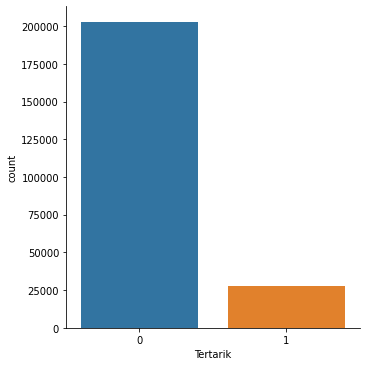

In [4]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [5]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [6]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42, k_neighbors=5)
x_data, y_data = smt.fit_sample(x_data, y_data)


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (324712, 10)
x_test shape: (81178, 10)
---------------------------------
y_train shape: (324712,)
y_test shape: (81178,)


## **Tuning Model**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [9]:
classifier = [
    DecisionTreeClassifier(random_state=42, splitter="random"),
    LogisticRegression(max_iter=5000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
]

name = [
    'Decision Tree',
    'Logistic Regression',
    'Gradient Boosting', 
    'AdaBoost',
    'Random Forest',
]


In [10]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}")


In [11]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)
    accuracy(models, i)


Akurasi model Decision Tree: 89.28
Akurasi model Logistic Regression: 78.02
Akurasi model Gradient Boosting: 83.6
Akurasi model AdaBoost: 81.98
Akurasi model Random Forest: 92.19


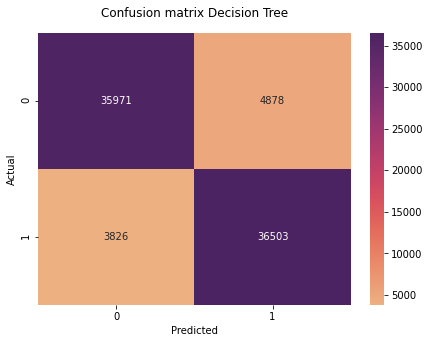


               precision    recall  f1-score   support

           0       0.90      0.88      0.89     40849
           1       0.88      0.91      0.89     40329

    accuracy                           0.89     81178
   macro avg       0.89      0.89      0.89     81178
weighted avg       0.89      0.89      0.89     81178




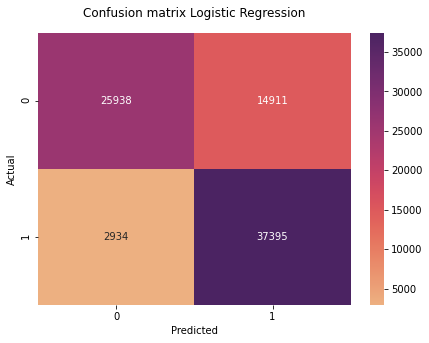


               precision    recall  f1-score   support

           0       0.90      0.63      0.74     40849
           1       0.71      0.93      0.81     40329

    accuracy                           0.78     81178
   macro avg       0.81      0.78      0.78     81178
weighted avg       0.81      0.78      0.78     81178




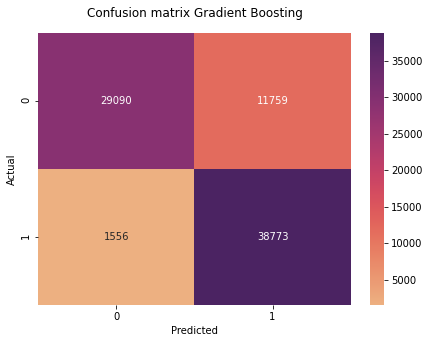


               precision    recall  f1-score   support

           0       0.95      0.71      0.81     40849
           1       0.77      0.96      0.85     40329

    accuracy                           0.84     81178
   macro avg       0.86      0.84      0.83     81178
weighted avg       0.86      0.84      0.83     81178




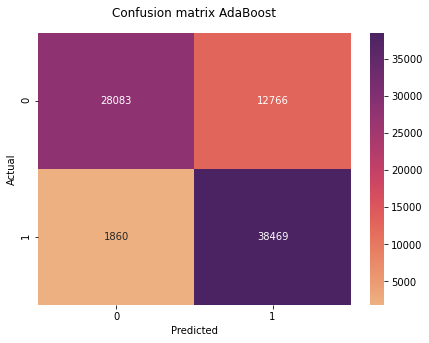


               precision    recall  f1-score   support

           0       0.94      0.69      0.79     40849
           1       0.75      0.95      0.84     40329

    accuracy                           0.82     81178
   macro avg       0.84      0.82      0.82     81178
weighted avg       0.84      0.82      0.82     81178




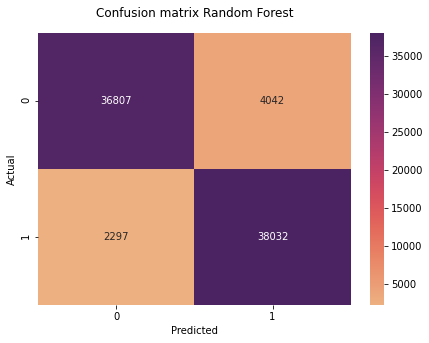


               precision    recall  f1-score   support

           0       0.94      0.90      0.92     40849
           1       0.90      0.94      0.92     40329

    accuracy                           0.92     81178
   macro avg       0.92      0.92      0.92     81178
weighted avg       0.92      0.92      0.92     81178




In [12]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result) 
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)

## **Validation Test**

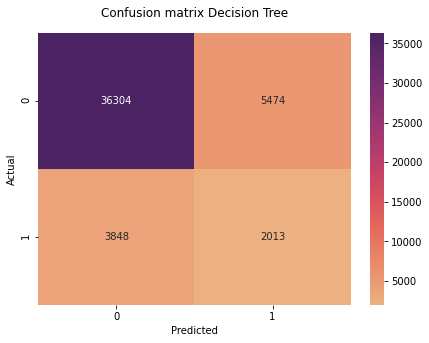


               precision    recall  f1-score   support

           0       0.90      0.87      0.89     41778
           1       0.27      0.34      0.30      5861

    accuracy                           0.80     47639
   macro avg       0.59      0.61      0.59     47639
weighted avg       0.83      0.80      0.81     47639




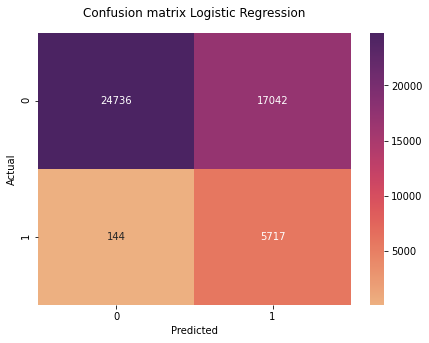


               precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639




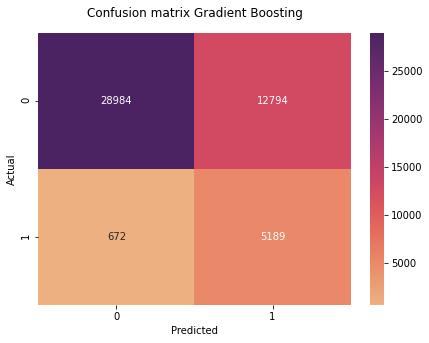


               precision    recall  f1-score   support

           0       0.98      0.69      0.81     41778
           1       0.29      0.89      0.44      5861

    accuracy                           0.72     47639
   macro avg       0.63      0.79      0.62     47639
weighted avg       0.89      0.72      0.77     47639




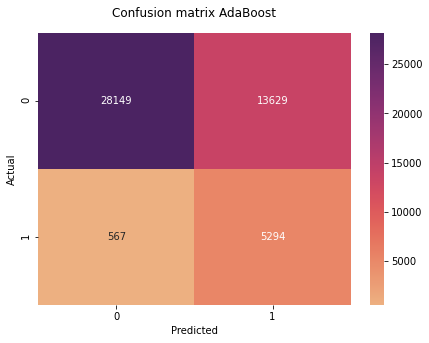


               precision    recall  f1-score   support

           0       0.98      0.67      0.80     41778
           1       0.28      0.90      0.43      5861

    accuracy                           0.70     47639
   macro avg       0.63      0.79      0.61     47639
weighted avg       0.89      0.70      0.75     47639




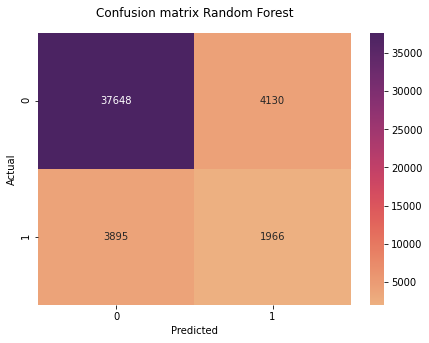


               precision    recall  f1-score   support

           0       0.91      0.90      0.90     41778
           1       0.32      0.34      0.33      5861

    accuracy                           0.83     47639
   macro avg       0.61      0.62      0.62     47639
weighted avg       0.83      0.83      0.83     47639




In [13]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)
